In [2]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt


In [3]:
df = pl.read_parquet(r'C:\Users\dadoi\OneDrive\Desktop\davide\example_data_week5\output\extract\polygon_df/plot_23.parquet')

In [4]:
df = df.drop_nans().drop_nulls()
df

Xw,Yw,band1,band2,band3,band4,band5,elev,plot_id,delta_z,delta_x,delta_y,distance_xy,angle_rad,vza,vaa_rad,vaa_temp,vaa,xcam,ycam,sunelev,saa,path
f64,f64,f32,f32,f32,f32,f32,f32,str,f32,f64,f64,f64,f32,f32,f64,f64,f64,f32,f32,f32,f32,str
563612.101292,5.7130e6,0.070561,0.158527,0.065911,0.298675,0.663345,187.834198,"""plot_23""",19.744476,10.336208,-1.35459,10.424592,1.08502,27.83,1.701107,13.234668,13.234668,563622.4375,5713042.5,62.788567,84.23156,"""IMG_0091_6.tif"""
563612.108596,5.7130e6,0.068326,0.149116,0.067453,0.27903,0.652353,187.832626,"""plot_23""",19.746048,10.328904,-1.354682,10.417361,1.085339,27.809999,1.701206,13.240388,13.240388,563622.4375,5713042.5,62.788567,84.23156,"""IMG_0091_6.tif"""
563612.1159,5.7130e6,0.061213,0.13374,0.067502,0.26045,0.632643,187.832291,"""plot_23""",19.746384,10.3216,-1.354773,10.410131,1.085633,27.799999,1.701306,13.246115,13.246115,563622.4375,5713042.5,62.788567,84.23156,"""IMG_0091_6.tif"""
563612.123204,5.7130e6,0.047885,0.114154,0.049312,0.22384,0.582722,187.832077,"""plot_23""",19.746597,10.314296,-1.354865,10.402901,1.085924,27.780001,1.701406,13.251851,13.251851,563622.4375,5713042.5,62.788567,84.23156,"""IMG_0091_6.tif"""
563612.130509,5.7130e6,0.034624,0.084735,0.031657,0.179828,0.494504,187.832001,"""plot_23""",19.746674,10.306991,-1.354957,10.395671,1.086212,27.76,1.701507,13.257595,13.257595,563622.4375,5713042.5,62.788567,84.23156,"""IMG_0091_6.tif"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
563612.590393,5.7130e6,0.036292,0.100575,0.041757,0.218346,0.583712,187.901535,"""plot_23""",19.656204,14.534607,-34.882643,37.789596,0.479636,62.52,2.746797,112.792725,112.792725,563627.125,5.713009e6,42.37545,44.58717,"""IMG_0084_6.tif"""
563612.597697,5.7130e6,0.039089,0.107848,0.041955,0.232209,0.593455,187.901825,"""plot_23""",19.655914,14.527303,-34.882735,37.786872,0.47966,62.52,2.746977,112.803002,112.803002,563627.125,5.713009e6,42.37545,44.58717,"""IMG_0084_6.tif"""
563612.605001,5.7130e6,0.041063,0.108749,0.041251,0.22754,0.588171,187.902069,"""plot_23""",19.65567,14.519999,-34.882826,37.784149,0.479684,62.52,2.747156,112.81328,112.81328,563627.125,5.713009e6,42.37545,44.58717,"""IMG_0084_6.tif"""


In [5]:
df = df.with_columns(
    (pl.col("delta_z")+pl.col("elev")).alias("zcam")
)
drone_positions = (
    df.select(["xcam", "ycam","zcam", ])      # keep only the two columns of interest
      .unique()                # drop duplicate rows
)
drone_positions

xcam,ycam,zcam
f32,f32,f32
563610.5625,5713016.5,207.547546
563596.625,5.713064e6,207.487885
563607.9375,5.713016e6,207.553223
563625.6875,5713009.5,207.490723
563594.8125,5713026.5,207.597534
…,…,…
563593.4375,5713034.5,207.571335
563632.125,5713005.5,207.579361
563617.125,5713025.5,207.574112


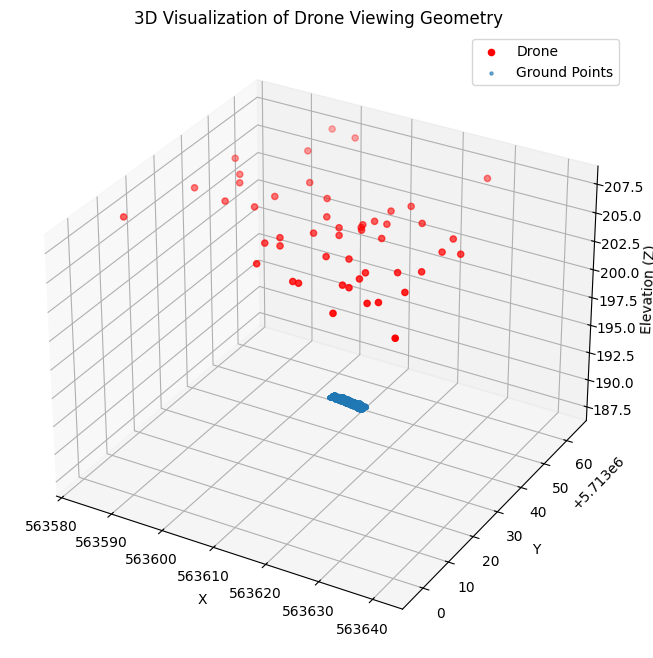

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
subsample = df.sample(10000)
# Drone position
ax.scatter(drone_positions["xcam"], drone_positions["ycam"], drone_positions["zcam"], c='red', label="Drone")
ax.scatter(subsample["Xw"], subsample["Yw"], subsample["elev"], s=5, alpha=0.6, label="Ground Points")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Elevation (Z)")
ax.set_title("3D Visualization of Drone Viewing Geometry")
ax.legend()


5712997.0 5713064.0
shape: (1, 3)
┌───────────┬────────────┬────────────┐
│ xcam      ┆ ycam       ┆ zcam       │
│ ---       ┆ ---        ┆ ---        │
│ f32       ┆ f32        ┆ f32        │
╞═══════════╪════════════╪════════════╡
│ 563641.25 ┆ 5.712997e6 ┆ 207.586258 │
└───────────┴────────────┴────────────┘ shape: (1, 3)
┌────────────┬────────────┬────────────┐
│ xcam       ┆ ycam       ┆ zcam       │
│ ---        ┆ ---        ┆ ---        │
│ f32        ┆ f32        ┆ f32        │
╞════════════╪════════════╪════════════╡
│ 563596.625 ┆ 5.713064e6 ┆ 207.487885 │
└────────────┴────────────┴────────────┘
shape: (1, 24)
┌────────────┬──────────┬──────────┬──────────┬───┬───────────┬───────────┬────────────┬───────────┐
│ Xw         ┆ Yw       ┆ band1    ┆ band2    ┆ … ┆ sunelev   ┆ saa       ┆ path       ┆ zcam      │
│ ---        ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---       ┆ ---       ┆ ---        ┆ ---       │
│ f64        ┆ f64      ┆ f32      ┆ f32      ┆   ┆ f32       ┆ f32

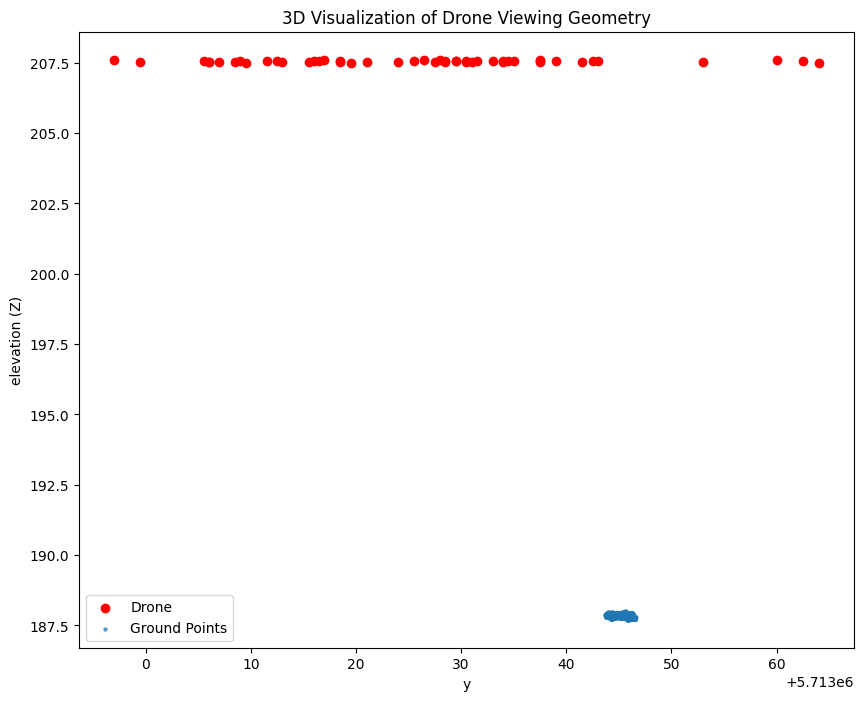

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
subsample = df.sample(10000)


#angle rays calculation
min_row_drone = drone_positions.filter(pl.col("ycam") == drone_positions["ycam"].min())
max_row_drone =  drone_positions.filter(pl.col("ycam") == drone_positions["ycam"].max())
print(min_pos_drone, max_pos_drone)
print(min_row_drone, max_row_drone)


min_row_field = subsample.filter(pl.col("Yw") == subsample["Yw"].min())
max_row_field =  subsample.filter(pl.col("Yw") == subsample["Yw"].max())
print(min_row_field, max_row_field)

#θ = atan2(y2 - y1, x2 - x1)



# Drone position
ax.scatter( drone_positions["ycam"], drone_positions["zcam"], c='red', label="Drone")
ax.scatter( subsample["Yw"], subsample["elev"], s=5, alpha=0.6, label="Ground Points")
ax.plot(min_row_drone, min_row_field, label="Drone")



ax.set_xlabel("y")
ax.set_ylabel("elevation (Z)")
ax.set_title("3D Visualization of Drone Viewing Geometry")
ax.legend()